# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 22.13 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

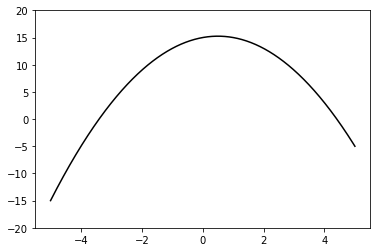

In [4]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

# def polynomial(coefs, x):
#     n = len(coefs)
#     return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [5]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

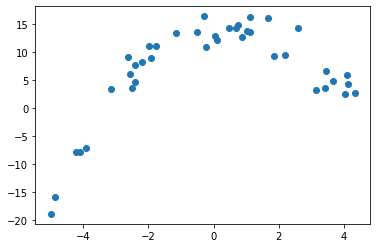

In [6]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [7]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [20]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    po = PolynomialFeatures(polyDegree,include_bias=False)
    X = po.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [26]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =  train_test_split(X_poly, Y, test_size=.2)

(32, 200)
(8, 200)
(32,)
(8,)


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 200)
(8, 200)
(32,)
(8,)


In [34]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [35]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)

model_no_reg = LinearRegression(normalize = True).fit(X_train, y_train)

Training error (rmse): 0.5289017182411696
Testing error (rmse): 274309.17335474933


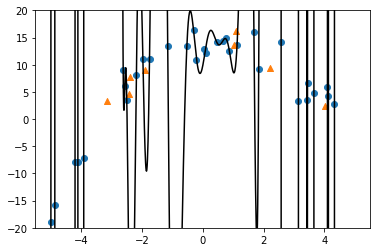

Polynomial coefficients
[9.787269245461172, 28.20436343017233, 103.12510457338222, -480.8966638119644, -352.2808321519281, 2156.4859001531318, -54.89171250933041, -3485.9540940639918, 664.4571257277977, 2779.6172992254324, -576.6358163067331, -1247.619522085302, 221.55277669281483, 331.22356457216796, -44.195189244967466, -51.75006751282032, 4.312896192225952, 4.39173401251022, -0.07208045082162193, -0.13883010015228894, -0.023844971439986776, -0.004862794232089099, 0.0017964363408346316, 0.0003438500297058214, -6.381475846121705e-06, 2.484576039690745e-06, -2.4634363951561475e-06, -1.1226850227077022e-07, 3.75297682951351e-08, -1.0746246198414093e-08, -2.1376874581152662e-09, 7.894686626583576e-11, 1.211990184712324e-11, -2.7976166845204947e-12, 4.744988710252756e-12, -4.980564756721094e-13, 2.697677148997602e-13, 6.7025589780351305e-15, 3.537195918018022e-15, 5.431496640345278e-16, -3.2266352482419387e-16, 7.038233118000489e-17, -6.95552674718643e-18, -1.8137031721203478e-19, -4.0031

In [36]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [38]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)
model_L1_reg =  linear_model.Lasso(alpha=0.1,normalize = True).fit(X_train, y_train)






Training error (rmse): 2.142932276526434
Testing error (rmse): 1.7805438721248126


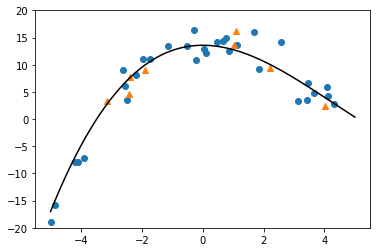

Polynomial coefficients
[13.578039674142527, 0.0, -0.8758959569394635, 0.06947578080898663, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 

In [39]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [40]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(alpha=0.1 , normalize= True).fit(X_train, y_train)

Training error (rmse): 2.135011231186259
Testing error (rmse): 1.9601754162665233


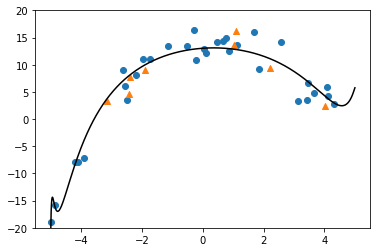

Polynomial coefficients
[13.028703349323365, 0.389733835796335, -0.5481651208668871, 0.018176770117264738, -0.013585685252324583, 0.0009044275025723186, -0.0002741417161859971, 3.7087090646781096e-05, -4.2120164076747934e-06, 1.2540352598929382e-06, -2.1789226381763725e-08, 3.634402169018382e-08, 2.001299756194437e-09, 9.107926103672092e-10, 1.3057235620625217e-10, 1.8562126719031967e-11, 5.951453516375038e-12, 2.0752227069955785e-13, 2.426047576455545e-13, -6.78575420161355e-15, 9.447180129434063e-15, -6.777005177980196e-16, 3.60640798173081e-16, -3.755365243040651e-17, 1.3654804590972004e-17, -1.7548192755065778e-18, 5.155721832274395e-19, -7.570216720485256e-20, 1.9459072967435207e-20, -3.1224377644831826e-21, 7.347734759618133e-22, -1.2526098880939863e-22, 2.7760270770733006e-23, -4.933854882394259e-24, 1.049111289072388e-24, -1.9189356244793667e-25, 3.9644079053418644e-26, -7.39561062124642e-27, 1.4973221073511247e-27, -2.8308448904181443e-28, 5.650213875057804e-29, -1.07778540560

In [41]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [42]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-2.395077,7.723543,-41.734927,7.599021,8.105719
1,4.021660,2.454299,-566015.088018,3.930594,4.201617
2,-1.898524,8.956020,-5.061357,9.945540,9.972487
3,1.031856,13.676624,8.521603,12.721779,12.852544
4,-2.410832,4.690236,-35.562163,7.513736,8.035500
5,1.108870,16.141450,11.762885,12.595772,12.792168
6,-3.132705,3.308124,530645.565599,2.846184,3.831942
7,2.197047,9.366124,2676.340927,10.086880,11.139241
